In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('scaled_average_daily_data.csv', parse_dates=['time'])
data.set_index('time', inplace=True)

In [3]:
data['month'] = data.index.month

In [4]:
data['sin_month'] = np.sin(2 * np.pi * data['month'] / 12)
data['cos_month'] = np.cos(2 * np.pi * data['month'] / 12)

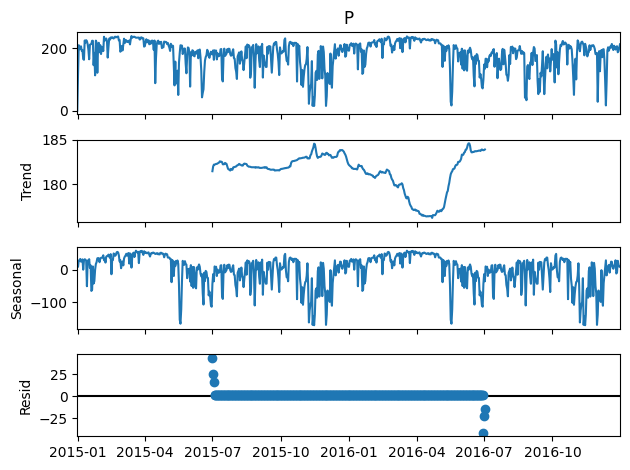

In [5]:
result = seasonal_decompose(data['P'], model='additive', period=365)
result.plot()
plt.show()

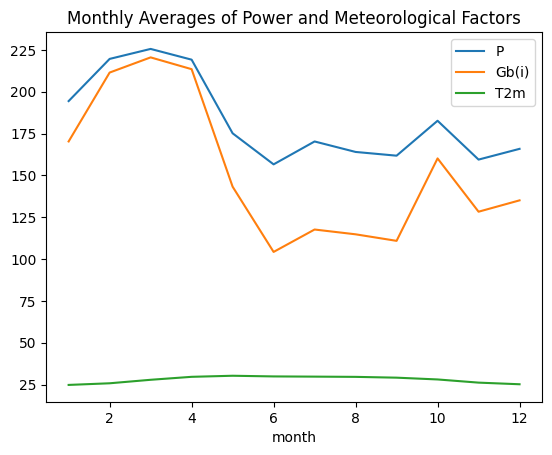

In [6]:
data.groupby('month')[['P', 'Gb(i)', 'T2m']].mean().plot()
plt.title('Monthly Averages of Power and Meteorological Factors')
plt.show()

In [7]:
features = ['Gb(i)', 'Gd(i)', 'Gr(i)', 'H_sun', 'T2m', 'WS10m', 'sin_month', 'cos_month']
target = 'P'

In [8]:
X = data[features]
y = data[target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 10.504585054052162


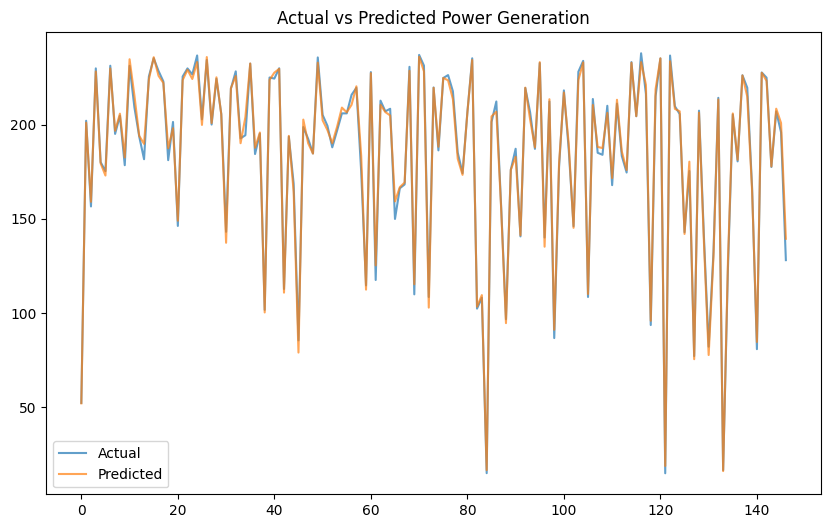

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Power Generation')
plt.show()

In [13]:
data['y_pred'] = model.predict(X)
data['error'] = np.abs(data['P'] - data['y_pred'])
seasonal_performance = data.groupby('month')['error'].mean()

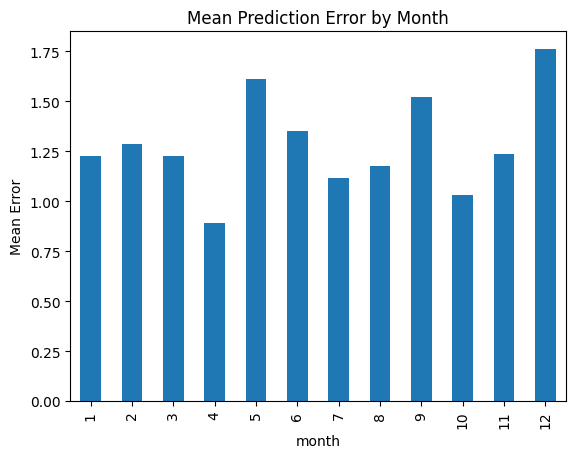

In [14]:
seasonal_performance.plot(kind='bar', title='Mean Prediction Error by Month')
plt.ylabel('Mean Error')
plt.show()

In [15]:
print(data['P'].describe())


count    732.000000
mean     182.705395
std       46.185105
min        0.000000
25%      164.692500
50%      195.240833
75%      215.199167
max      239.265417
Name: P, dtype: float64


An error of ~1.8% relative to the mean is very good for most forecasting tasks.

In [16]:
rmse = mse ** 0.5
print(f"RMSE: {rmse}")

RMSE: 3.2410777611856463
